In [160]:
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier, MLPRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from sklearn.preprocessing import StandardScaler
import pandas as pd

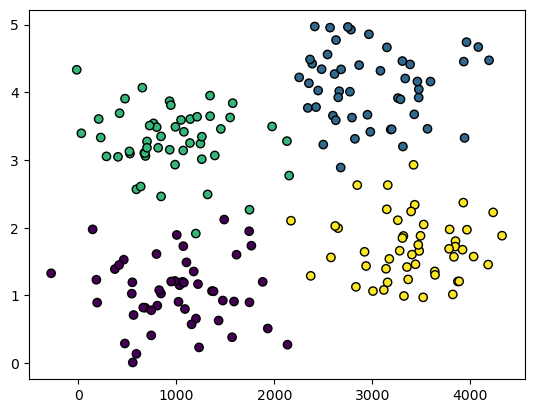

In [120]:
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
X, y = make_blobs(n_samples=200, 
                          centers=blob_centers, 
                          cluster_std=0.5,
                          random_state=0)

X[:, 0] *= 1000

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

In [121]:
clf = MLPClassifier(hidden_layer_sizes=(6,), 
                    random_state=1).fit(X, y)

In [122]:
print("Веса между входным и скрытым слоем:")
print(clf.coefs_[0])
print("\nВеса между скрытым и выходным слоем:")
print(clf.coefs_[1])

Веса между входным и скрытым слоем:
[[-0.09809877  0.33667051 -0.82024119 -0.29720839 -0.56852789 -0.66056109]
 [-0.58903611 -0.31219238 -0.22424296  0.11423652 -0.18324369  0.37321781]]

Веса между скрытым и выходным слоем:
[[-0.51316658 -0.43365467  0.43189995  0.68148414]
 [-0.24370005  0.34328608  0.57835494  0.57889271]
 [-0.59713359 -0.67678056 -0.46609801  0.54011704]
 [-0.5769702  -0.10221922  0.75476969  0.00610289]
 [ 0.34285864 -0.25645017  0.33417991  0.47281254]
 [-0.7006119   0.35515533  0.80295119  0.33880635]]


In [123]:
for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:,j]
        print(i, j, weights, end=", ")
        print()
    print()

0 0 [-0.09809877 -0.58903611], 
0 1 [ 0.33667051 -0.31219238], 
0 2 [-0.82024119 -0.22424296], 
0 3 [-0.29720839  0.11423652], 
0 4 [-0.56852789 -0.18324369], 
0 5 [-0.66056109  0.37321781], 

1 0 [-0.51316658 -0.24370005 -0.59713359 -0.5769702   0.34285864 -0.7006119 ], 
1 1 [-0.43365467  0.34328608 -0.67678056 -0.10221922 -0.25645017  0.35515533], 
1 2 [ 0.43189995  0.57835494 -0.46609801  0.75476969  0.33417991  0.80295119], 
1 3 [0.68148414 0.57889271 0.54011704 0.00610289 0.47281254 0.33880635], 



In [124]:
print("Веса смещения для скрытого слоя:")
print(clf.intercepts_[0])
print("\nВеса смещения для выходного слоя:")
print(clf.intercepts_[1])

Веса смещения для скрытого слоя:
[-0.55752645  0.60978582 -0.8640854   0.33258994 -0.18652436  0.05696655]

Веса смещения для выходного слоя:
[-0.29413473  0.49414359 -0.60792984 -0.11888525]


In [125]:
confusion_matrix(y, clf.predict(X))

array([[ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50]], dtype=int64)

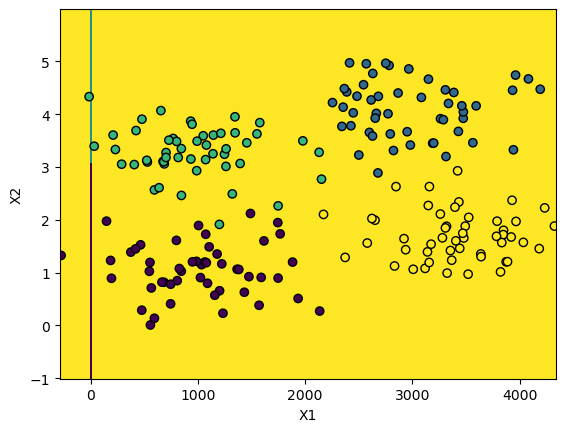

In [126]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [127]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

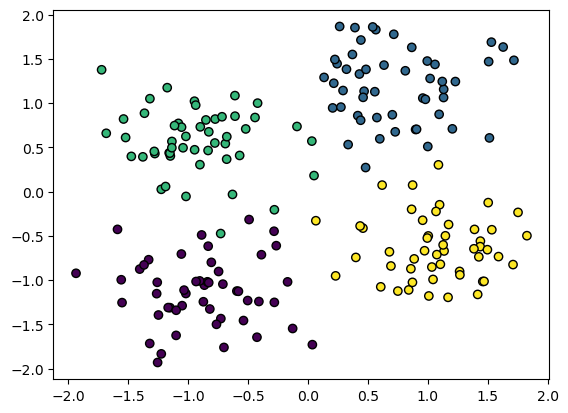

In [128]:
plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


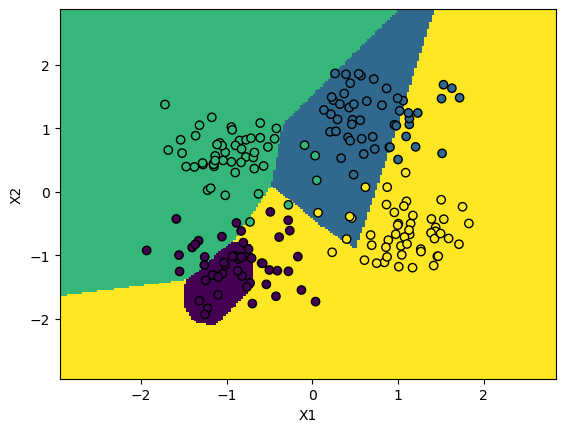

array([[22,  0, 11, 17],
       [ 0, 38,  0, 12],
       [ 0,  3, 45,  2],
       [ 0,  5,  0, 45]], dtype=int64)

In [129]:
clf = MLPClassifier(hidden_layer_sizes=(6,), 
                    random_state=1).fit(X, y)

X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()
confusion_matrix(y, clf.predict(X))

Iteration 1, loss = 1.34443150
Iteration 2, loss = 1.34022000
Iteration 3, loss = 1.33602028
Iteration 4, loss = 1.33183254
Iteration 5, loss = 1.32765699
Iteration 6, loss = 1.32349552
Iteration 7, loss = 1.31934736
Iteration 8, loss = 1.31522056
Iteration 9, loss = 1.31110805
Iteration 10, loss = 1.30701034
Iteration 11, loss = 1.30293008
Iteration 12, loss = 1.29886478
Iteration 13, loss = 1.29481359
Iteration 14, loss = 1.29077782
Iteration 15, loss = 1.28675774
Iteration 16, loss = 1.28275141
Iteration 17, loss = 1.27875918
Iteration 18, loss = 1.27478126
Iteration 19, loss = 1.27081707
Iteration 20, loss = 1.26686650
Iteration 21, loss = 1.26293056
Iteration 22, loss = 1.25901540
Iteration 23, loss = 1.25512284
Iteration 24, loss = 1.25124813
Iteration 25, loss = 1.24739536
Iteration 26, loss = 1.24355948
Iteration 27, loss = 1.23974014
Iteration 28, loss = 1.23594121
Iteration 29, loss = 1.23215642
Iteration 30, loss = 1.22838560
Iteration 31, loss = 1.22462783
Iteration 32, los

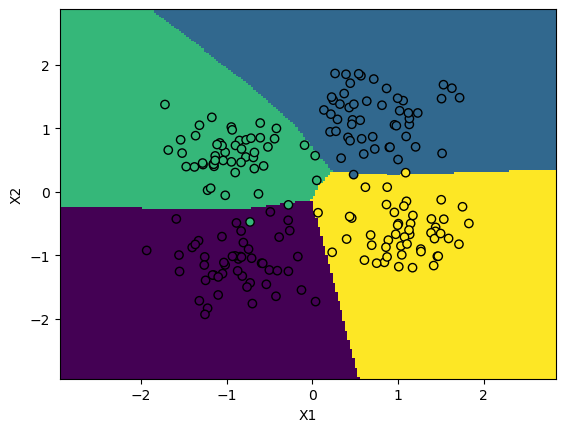

array([[50,  0,  0,  0],
       [ 0, 49,  0,  1],
       [ 2,  0, 48,  0],
       [ 0,  1,  0, 49]], dtype=int64)

In [130]:
clf = MLPClassifier(hidden_layer_sizes=(6,), max_iter=10_000, verbose=True).fit(X, y)

X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


confusion_matrix(y, clf.predict(X))

In [131]:
def make_model_out(X,y,show_mass=False,model =0, search_time=False,scale_x=False,plot=True,metrics=True,**kwargs):
    model = {
        0:MLPClassifier,
        1:MLPRegressor
    }[model]
    if search_time:
        start_time = time.time()  # Начало замера времени
        clf = model(**kwargs).fit(X, y)
        linear_time = time.time() - start_time  # Конец замера времени

        print(f"Время обучения модели: {linear_time:.4f} секунд")
    else:
         clf = model(**kwargs).fit(X, y)

    if scale_x:
        scaler = StandardScaler().fit(X)
        X = scaler.transform(X)

    if plot:
        X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
        X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
        X0_grid, X1_grid = np.meshgrid(X0, X1)

        y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
        plt.pcolormesh(X0_grid, X1_grid, y_predict)

        plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.show()

    if metrics:
        print(confusion_matrix(y, clf.predict(X)),'\n\n')
        print("Score = ", clf.score(X, y))
    
    if show_mass:
        print("\nВеса между входным и скрытым слоем:")
        print(clf.coefs_[0])
        print("\nВеса между скрытым и выходным слоем:")
        print(clf.coefs_[1])
        print("Веса смещения для скрытого слоя:")
        print(clf.intercepts_[0])
        print("\nВеса смещения для выходного слоя:")
        print(clf.intercepts_[1])
    return clf

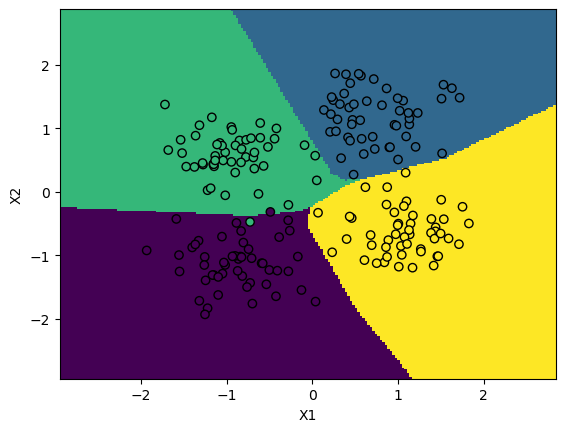

[[49  0  1  0]
 [ 0 50  0  0]
 [ 1  0 49  0]
 [ 0  0  0 50]] 


Score =  0.99


In [132]:
clf = MLPClassifier(hidden_layer_sizes=(6, 6, 6), max_iter=10_000).fit(X, y)


X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


print(confusion_matrix(y, clf.predict(X)),'\n\n')
print("Score = ", clf.score(X, y))

# Задания для самостоятельного выполнения

## 1. Создайте однослойный перцептрон с 1, 2, 10 и 100 нейронами. Сравние их точность и сделайте вывод о достаточном количестве нейронов.

### 1

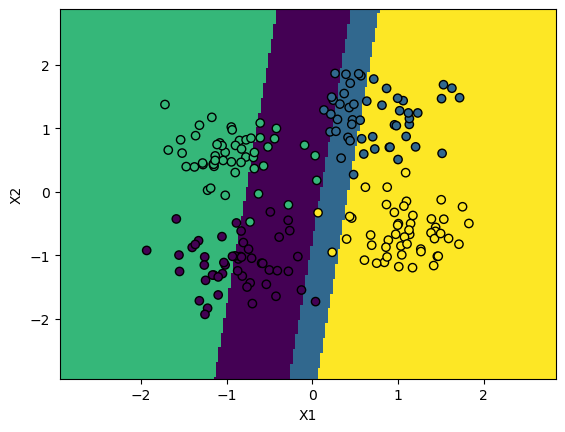

[[25  1 24  0]
 [ 6 16  0 28]
 [15  0 35  0]
 [ 0  2  0 48]] 


Score =  0.62


MLPClassifier(hidden_layer_sizes=[1], max_iter=10000)

In [133]:
make_model_out(X,y,hidden_layer_sizes=[1], max_iter=10_000)

### 2

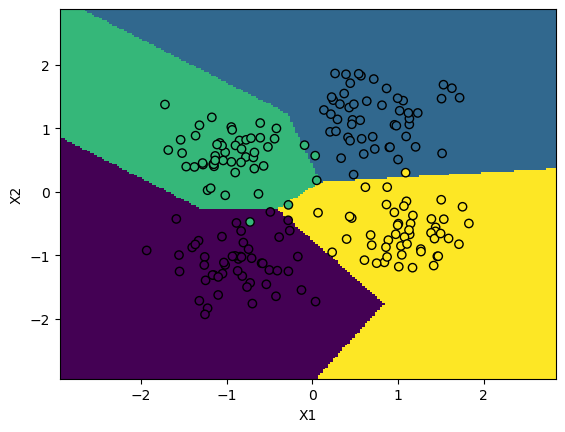

[[50  0  0  0]
 [ 0 50  0  0]
 [ 1  2 46  1]
 [ 0  1  0 49]] 


Score =  0.975


MLPClassifier(hidden_layer_sizes=[2], max_iter=10000)

In [134]:
make_model_out(X,y,hidden_layer_sizes=[2], max_iter=10_000)

### 10

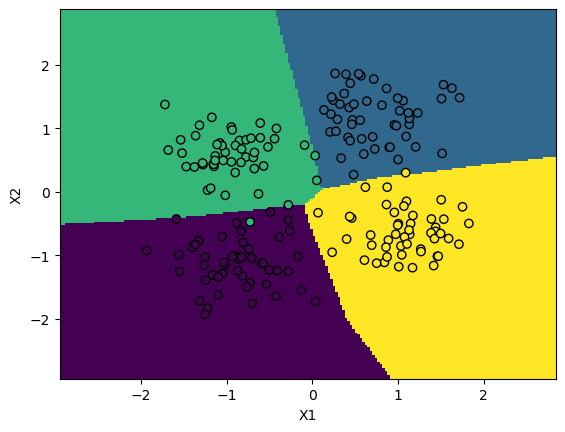

[[50  0  0  0]
 [ 0 50  0  0]
 [ 1  1 48  0]
 [ 0  1  0 49]] 


Score =  0.985


MLPClassifier(hidden_layer_sizes=[10], max_iter=10000)

In [135]:
make_model_out(X,y,hidden_layer_sizes=[10], max_iter=10_000)

### 100

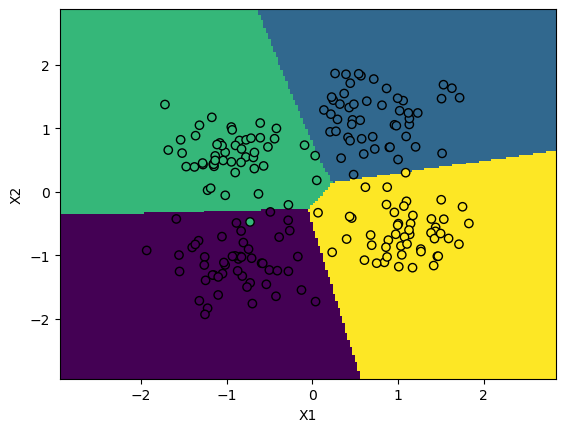

[[50  0  0  0]
 [ 0 50  0  0]
 [ 1  0 49  0]
 [ 0  0  0 50]] 


Score =  0.995


MLPClassifier(hidden_layer_sizes=[100], max_iter=10000)

In [136]:
make_model_out(X,y,hidden_layer_sizes=[100], max_iter=10_000)

Не всегда с увеличением количества нейронов увеличивается качество модели


## 2. Создайте и оцените модель с двумя, тремя и десятью скрытыми слоями с одинаковым количеством нейронов. Сравните их точность и сделайте вывод о достаточном количестве слоев.

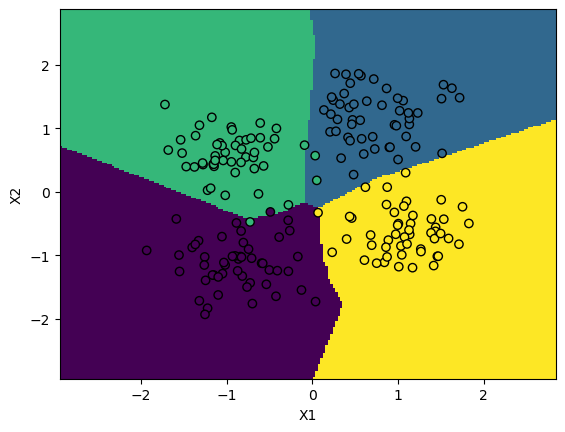

[[49  0  1  0]
 [ 0 50  0  0]
 [ 1  2 47  0]
 [ 1  0  0 49]] 


Score =  0.975


MLPClassifier(hidden_layer_sizes=[6, 6], max_iter=10000)

In [137]:
make_model_out(X,y,hidden_layer_sizes=[6,6], max_iter=10_000)

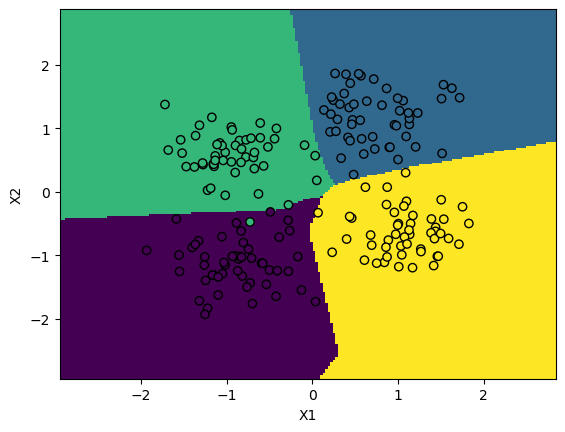

[[50  0  0  0]
 [ 0 50  0  0]
 [ 1  0 49  0]
 [ 0  0  0 50]] 


Score =  0.995


MLPClassifier(hidden_layer_sizes=[6, 6, 6], max_iter=10000)

In [138]:
make_model_out(X,y,hidden_layer_sizes=[6,6,6], max_iter=10_000)

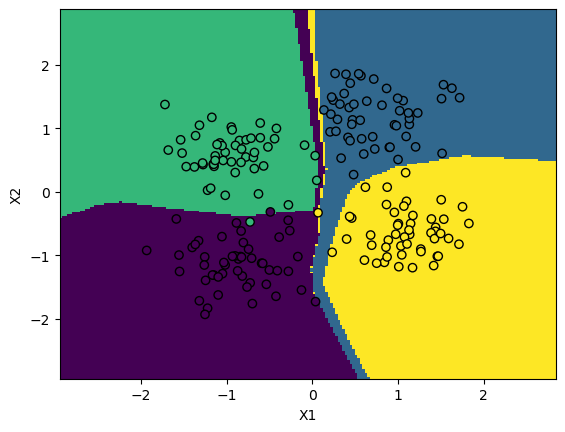

[[49  0  1  0]
 [ 0 50  0  0]
 [ 1  0 49  0]
 [ 0  0  0 50]] 


Score =  0.99


MLPClassifier(hidden_layer_sizes=[6, 6, 6, 6, 6, 6, 6, 6, 6, 6], max_iter=10000)

In [139]:
make_model_out(X,y,hidden_layer_sizes=[6,6,6,6,6,6,6,6,6,6], max_iter=10_000)

Для этих данных достаточно трех слоев

## 3. Для глубокой модели выведите веса всех нейронов на всех слоях. Выведите значения векторов весов смещения.

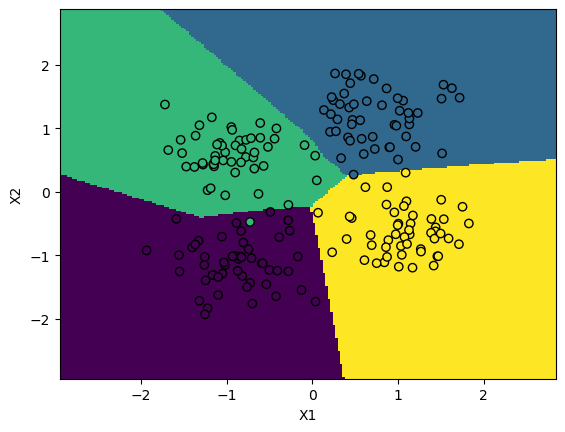

[[50  0  0  0]
 [ 0 50  0  0]
 [ 1  0 49  0]
 [ 0  0  0 50]] 


Score =  0.995

Веса между входным и скрытым слоем:
[[-4.74697819e-01  1.43099710e+00  2.37300995e-01  7.40407426e-01
   1.35594099e+00  2.85001088e-06]
 [-1.15511680e+00  1.23479595e+00  2.18643425e-02 -7.37334604e-01
  -5.22492963e-01  8.17868948e-06]]

Веса между скрытым и выходным слоем:
[[ 1.06672388e-01 -5.20539794e-01  5.69247598e-01  6.89890461e-11
   6.93556414e-01 -9.51381714e-02]
 [-5.65853341e-01 -4.66735985e-01  1.02553004e+00 -2.53841301e-07
  -5.41948385e-01  1.45665072e-02]
 [-3.68790237e-01  5.40695437e-02 -3.21889679e-01 -8.58996258e-02
  -4.46932135e-01 -2.65056864e-03]
 [ 1.10864678e+00  3.53502171e-02  7.14170641e-01 -9.33497961e-05
   3.73788053e-01  3.08035840e-17]
 [ 1.35621318e+00  5.30214778e-01  8.83512438e-02 -1.74851720e-03
  -5.01777085e-01 -8.62580780e-06]
 [ 2.82625291e-14 -4.79994573e-02 -1.28124441e-04  2.68257055e-02
  -7.57850742e-05 -2.36502856e-08]]
Веса смещения для скрытого слоя:
[ 0

MLPClassifier(hidden_layer_sizes=[6, 6, 6], max_iter=10000)

In [140]:
make_model_out(X,y,hidden_layer_sizes=[6,6,6], max_iter=10_000, show_mass=True)

## 4.Постройте и оцените модель с большим количеством нейронов и слоев. Замерьте время выполнения обучения, сравните со временем обучения более простых моделей.

### 20 слоев

Время обучения модели: 0.1890 секунд


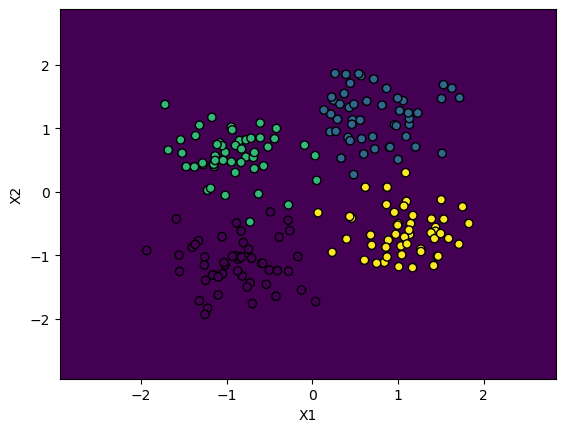

[[ 0  0  0 50]
 [ 0  0  0 50]
 [ 0  0  0 50]
 [ 0  0  0 50]] 


Score =  0.25


MLPClassifier(hidden_layer_sizes=[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
                                  6, 6, 6, 6, 6],
              max_iter=10000)

In [141]:
make_model_out(X,y,hidden_layer_sizes=[6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6], max_iter=10_000, search_time=True)

### 2 слоя

Время обучения модели: 0.2937 секунд


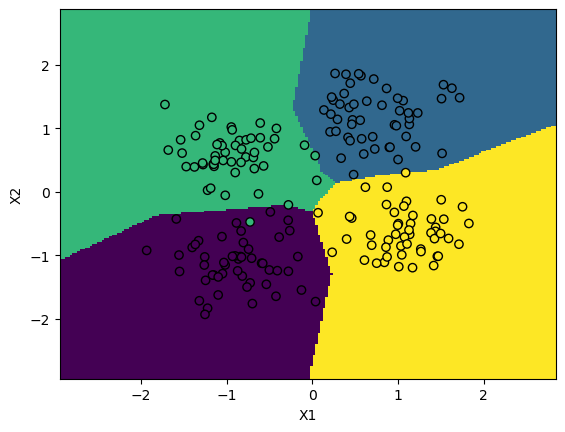

[[50  0  0  0]
 [ 0 50  0  0]
 [ 1  1 48  0]
 [ 0  1  0 49]] 


Score =  0.985


MLPClassifier(hidden_layer_sizes=[6, 6], max_iter=10000)

In [142]:
make_model_out(X,y,hidden_layer_sizes=[6,6], max_iter=10_000, search_time=True)

Для этих данных множество слоев играет ухудшающую роль как в качестве модели, так и во времени ее обучения

## 6.Постройте и оцените модель регрессии с помощью перцептрона на датасете, который вы использовали на контрольной по регрессии.

In [176]:
from sklearn.datasets import fetch_openml
df=fetch_openml('vineyard',version=1)
y=df.target
X=df.data

In [186]:
clf = MLPRegressor(hidden_layer_sizes=(1000,100, 1000,100,10)).fit(X, y)
clf.score(X,y)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7862593492658867

## 5.Постройте и оцените модель классификации с помощью перцептрона на датасете, который вы использовали на контрольной по классификиации (если вы ее не выполняли, возьмите любой датасет из раздела "real world datasets" в библиотеке sklearn).

In [187]:

from sklearn.datasets import fetch_openml
df=fetch_openml('vineyard',version=2)
y=df.target
X=df.data

m = make_model_out(X,y,hidden_layer_sizes=[1000,100,10,1000,100,10], max_iter=1000000, search_time=True,plot=False, model=0,metrics=False)
m.score(X,y)

Время обучения модели: 2.2894 секунд


0.9038461538461539